In [1044]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.utils import plot_model # type: ignore

tf.__version__

'2.18.0'

In [1045]:
EPOCHS = 300
batch_size= 32

In [1046]:
df = pd.read_csv('Pokemon.csv')

In [1047]:
# df.info()
encoder = OneHotEncoder(sparse_output=False)
onehot = encoder.fit_transform(df[['Type 1', 'Type 2']])

In [1048]:
onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0.])

In [1049]:
column_names = encoder.get_feature_names_out(['Type 1', 'Type 2'])
encoded_df = pd.DataFrame(onehot, columns=column_names)
result = pd.concat([df, encoded_df], axis=1)
nome = result['Name']
df_y = result[['Type 1_Bug', 'Type 1_Dark','Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy','Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost','Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal','Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel','Type 1_Water']]

In [1050]:
df_y.head()

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1051]:
result.drop(["Type 1", "Type 2", 'Name', 'Total','#','Type 1_Bug', 'Type 1_Dark','Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy','Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost','Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal','Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel','Type 1_Water'], axis=1,  inplace=True)

In [1052]:
dict_m ={False: 0, True: 1}
result['Legendary'] = result['Legendary'].map(dict_m)

In [1053]:
for col in result.columns.values:
    result[col] = result[col]/result[col].max()

In [1054]:
result.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 2_Bug,Type 2_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_nan
0,0.176471,0.257895,0.213043,0.335052,0.282609,0.250000,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.235294,0.326316,0.273913,0.412371,0.347826,0.333333,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.313725,0.431579,0.360870,0.515464,0.434783,0.444444,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.313725,0.526316,0.534783,0.628866,0.521739,0.444444,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.152941,0.273684,0.186957,0.309278,0.217391,0.361111,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1055]:
size_input = len(result.columns.values)
size_input

27

In [1056]:
len_classi = len(df_y.columns.values)
len_classi

18

In [1057]:
X  = result.to_numpy()
y = df_y.to_numpy()
X.astype('float')
y.astype('float')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1058]:
X[0],y[0]

(array([0.17647059, 0.25789474, 0.21304348, 0.33505155, 0.2826087 ,
        0.25      , 0.16666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]))

In [1059]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1060]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [1061]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [1062]:
def create_model(units=256):
    model = Sequential()
    model.add(Dense(units*2, activation='relu', input_shape=(size_input,)))
    model.add(Dropout(0.3))
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len_classi, activation='softmax'))
    return model
model = create_model()

/home/danie/anaconda3/envs/py311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1063]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',
              metrics=['accuracy'] )

In [1064]:
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)               │ (None, 512)            │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,290 (587.07 KB)

 Trainable params: 150,290 (587.07 KB)

 Non-trainable params: 0 (0.00 B)

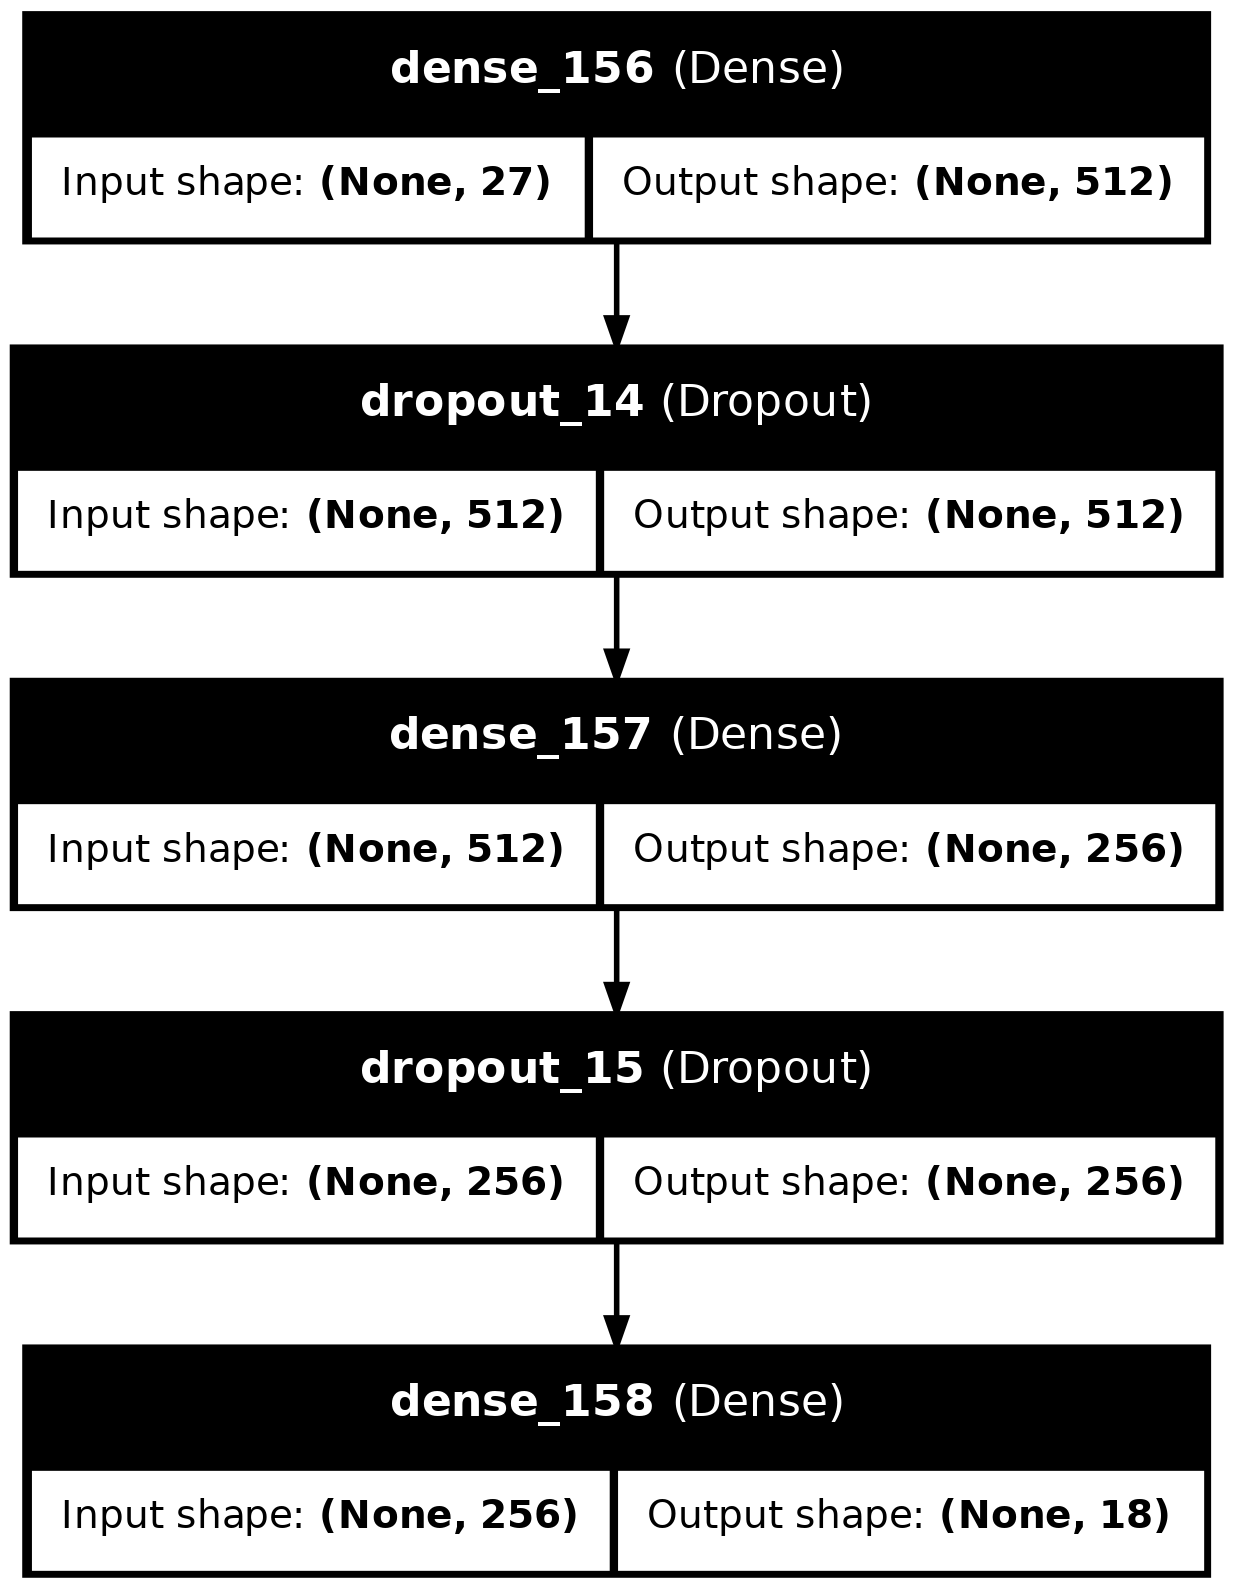

In [1065]:
plot_model(
    model,
    to_file='images/model_architecture.png',  # Percorso del file
    show_shapes=True,                 # Mostra le dimensioni dei tensori
    show_layer_names=True,            # Mostra i nomi dei layer
    rankdir='TB'                      # 'TB' per top-bottom, 'LR' per left-right
)

In [1066]:
checkpoint_path = "model/pokemon_model.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [1067]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
    monitor='val_loss',       # Metrica da monitorare
    save_best_only=True,      # Salva solo se il modello è migliorato
    save_weights_only=False,  # Salva l'intero modello (architettura + pesi)
    mode='min',               # Salva il modello se la metrica monitorata diminuisce
    verbose=1  )

In [1068]:
history = model.fit(train_dataset, epochs=EPOCHS,
                      validation_data=test_dataset,
                      callbacks=[cp_callback])

Epoch 1/300
 1/18 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - accuracy: 0.0312 - loss: 2.9086
Epoch 1: val_loss improved from inf to 2.88586, saving model to model/pokemon_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0495 - loss: 2.9074 - val_accuracy: 0.0958 - val_loss: 2.8859
Epoch 2/300
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0938 - loss: 2.8897
Epoch 2: val_loss improved from 2.88586 to 2.86233, saving model to model/pokemon_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0973 - loss: 2.8777 - val_accuracy: 0.1208 - val_loss: 2.8623
Epoch 3/300
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0938 - loss: 2.8757
Epoch 3: val_loss improved from 2.86233 to 2.84176, saving model to model/pokemon_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1561 - loss: 2.8464 - val_accuracy: 0.1375 - val_loss: 2.8418
Epoch 4/300
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1250 - loss: 2.8682
Epoch 4: val_loss improved from 2.8

In [1069]:
def plot_history(history):
    key = list(history.history.keys())
    plt.figure(1, figsize=(16,9))
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key[0]])
    plt.plot(history.history[key[2]])
    plt.title("Comparazione "+ str(key[0]))
    plt.legend([key[0], key[2]])
    plt.xlabel("epochs")
    plt.ylabel(str(key[0]))

    # Creare la seconda figura
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key[1]])
    plt.plot(history.history[key[3]])
    plt.title("Comparazione "+ str(key[1]))
    plt.legend([key[1], key[3]])
    plt.xlabel("epochs")
    plt.ylabel(str(key[1]))
    
    plt.savefig('images/'+str(key[0])+'_'+str(key[1])+'.png')

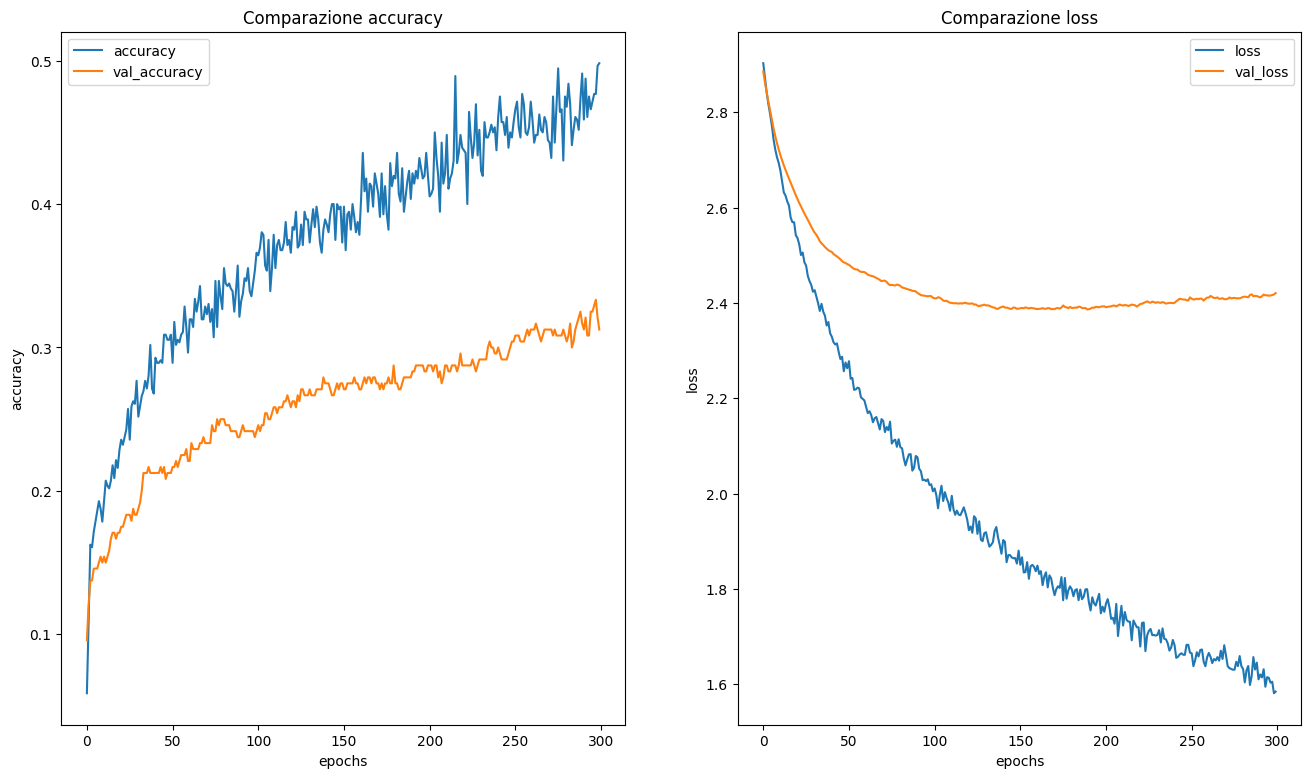

In [1070]:
plot_history(history)

In [1071]:
predictions = model.predict(X_test)
print(predictions[0])
print(df_y.columns.values[np.argmax(predictions[0], axis=0)])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.00389727 0.2468755  0.00577803 0.01062812 0.00197462 0.00316188
 0.01590177 0.14183466 0.10925392 0.02060874 0.00164048 0.01907011
 0.00104023 0.00148997 0.0060197  0.04435992 0.00572645 0.36073866]
Type 1_Water
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


In [1072]:

best_model = tf.keras.models.load_model('model/pokemon_model.keras')
results_evaluate= best_model.evaluate(X_test, y_test)
res_dict = dict(zip(best_model.metrics_names, results_evaluate))
for res in res_dict:
    print(f"{res}: {res_dict[res]}")




8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.2239 - loss: 2.4953
loss: 2.3861773014068604
compile_metrics: 0.27916666865348816
